In [1]:
import multiprocessing
import os
import pickle
import sys
from multiprocessing import Pool

import numpy as np
from tqdm import tqdm
from hydra import initialize, compose

In [2]:
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
    
# enable use of local packages
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
from mejiro.utils import util

array_dir = os.path.join(array_dir, 'skypy_output')
util.create_directory_if_not_exists(array_dir)

In [3]:
def get_model(lens):
    grid_oversample = 5
    return lens, lens.get_array(num_pix=51 * grid_oversample, side=5.61)

In [6]:
# open pickled lens list
with open(os.path.join(pickle_dir, '02_skypy_output_lens_list_with_subhalos'), 'rb') as results_file:
    lens_list = pickle.load(results_file) 

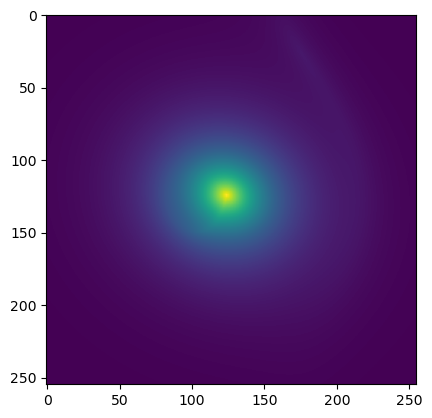

In [10]:
model = lens_list[0].get_array(num_pix=51 * 5, side=5.61)

from mejiro.plots import plot

plot.plot(model)

In [8]:
# go sequentially for now
updated_lenses = []
for i, lens in tqdm(enumerate(lens_list), total=len(lens_list)):
    model = lens.get_array(num_pix=51 * 5, side=5.61)
    np.save(os.path.join(array_dir, f'skypy_output_{str(i).zfill(8)}.npy'), model)
    # updated_lenses.append(lens)

  0%|          | 0/100 [00:25<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# pickle lens list
pickle_target = os.path.join(pickle_dir, '03_skypy_output_lens_list_models')
util.delete_if_exists(pickle_target)
with open(pickle_target, 'ab') as results_file:
    pickle.dump(updated_lenses, results_file)